## Data Exploration

### 1. Import:

In [1]:
import pandas as pd
import numpy as np 
import os
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Data exploration:

#### 2.1. Read data from file:

In [2]:
raw_df = pd.read_csv('../Assert/ingredients.csv')
raw_df.head()

,Name of dish,soda,turmeric mixture,herb,yogurt,butter,beef bone,chili lemongrass fish sauce,beef fillet,chipotle smoked pepper powder,...,kiwi,lime juice,tea leaves,white sesame,eel,green onion,ice cubes,pigeon,chinese sausages,white vinegar
0,10 common problems and mistakes when making bread,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,11 ways to use leftover egg yolks,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12 types of nuts for baking,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,14 ways to make Sponge cake/Gato for birthday ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,14 ways to use leftover egg whites,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 2.2. Explore data:

##### - How many rows and how many columns?

In [3]:
shape = raw_df.shape
shape

(1057, 814)

The raw dataset has *1057* rows and *814* columns, which satisfies the requirements about the size of dataset.

##### - What are the meaning of each row?

Each row contains the information about the ingredients of a dish.

##### - Are there duplicated rows?

In [4]:
def count_duplicated_rows(df: pd.DataFrame) -> bool:
    duplicated_df = df[df.duplicated(keep='first')]
    num_duplicated = duplicated_df.shape[0]
    return num_duplicated

In [5]:
print(f"Number of duplicated rows: {count_duplicated_rows(raw_df)}")

Number of duplicated rows: 82


The raw dataset contains *82* duplicated rows, so let's remove them.

In [6]:
raw_df = raw_df.drop_duplicates()

In [7]:
print(f"Number of duplicated rows after update raw data: {count_duplicated_rows(raw_df)}")

Number of duplicated rows after update raw data: 0


##### - What are the meaning of each column?

- The first column `Name of dish` contains the name of each dish.
- The remaining columns represent each ingredient with the value of each cell in the column being 0 if the dish doesn't have this ingredient and 1 if it has.

##### - What is the current data type of each column? Are there columns having inappropriate data types?

In [8]:
# convert to dictionary in order to be easier to see the data type of all columns
raw_df.dtypes.to_dict()

{'Name of dish': dtype('O'),
 'soda': dtype('int64'),
 'turmeric mixture': dtype('int64'),
 'herb': dtype('int64'),
 'yogurt': dtype('int64'),
 'butter': dtype('int64'),
 'beef bone': dtype('int64'),
 'chili lemongrass fish sauce': dtype('int64'),
 'beef fillet': dtype('int64'),
 'chipotle smoked pepper powder': dtype('int64'),
 'cocoa powder': dtype('int64'),
 'tea po green tea pork sausage': dtype('int64'),
 'cashew': dtype('int64'),
 'cherry tomatoes': dtype('int64'),
 'sticky rice flour': dtype('int64'),
 'virgin olive oil': dtype('int64'),
 'bbq sauce': dtype('int64'),
 'cinnamon': dtype('int64'),
 'oyster sauce': dtype('int64'),
 'green': dtype('int64'),
 'rice flour': dtype('int64'),
 'dumpling skins': dtype('int64'),
 'american beef belly': dtype('int64'),
 'nutmeg': dtype('int64'),
 'bbq marinade': dtype('int64'),
 'low-fat mayonnaise': dtype('int64'),
 'wood ear mushroom': dtype('int64'),
 'peanut': dtype('int64'),
 'dark rum': dtype('int64'),
 'black pepper': dtype('int64'),

All the columns of the raw data seem to have appropritate types for their meanings.

##### - With each numerical column, how are values distributed?

- What is the percentage of missing values?

In [9]:
# collect numerical columns' data
numerical_cols = raw_df[raw_df.keys()[1:]]
numerical_cols.head()

,soda,turmeric mixture,herb,yogurt,butter,beef bone,chili lemongrass fish sauce,beef fillet,chipotle smoked pepper powder,cocoa powder,...,kiwi,lime juice,tea leaves,white sesame,eel,green onion,ice cubes,pigeon,chinese sausages,white vinegar
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# check if there are any missing values
missing_values = numerical_cols.isnull().sum()
missing_values

soda                0
turmeric mixture    0
herb                0
yogurt              0
butter              0
                   ..
green onion         0
ice cubes           0
pigeon              0
chinese sausages    0
white vinegar       0
Length: 813, dtype: int64

In [11]:
if all(missing_values == 0):
    print("No missing values in the numerical columns")

No missing values in the numerical columns


- Min? Max? Are they abnormal?

In [12]:

if all(numerical_cols.min() == 0) and all(numerical_cols.max() == 1):
    print("All the values of numerical columns are normal (between 0 and 1).")
else:
    abnormal_columns = numerical_cols.columns[
        ~((0 <= numerical_cols.min() <= 1) & (0 <= numerical_cols.max() <= 1))
    ]
    print(f"There are some values that are not normal in columns: {abnormal_columns}.")

All the values of numerical columns are normal (between 0 and 1).


##### - With each categorical column, how are values distributed?

- What is the percentage of missing values?

In [13]:
# collect categorical columns' data
categorical_col = raw_df[raw_df.keys()[0]]
categorical_col.head()

0    10 common problems and mistakes when making bread
1                    11 ways to use leftover egg yolks
2                          12 types of nuts for baking
3    14 ways to make Sponge cake/Gato for birthday ...
4                   14 ways to use leftover egg whites
Name: Name of dish, dtype: object

In [14]:
# check if there are any missing values
missing_values = categorical_col.isna().sum()
missing_values

np.int64(0)

In [15]:
if missing_values == 0:
    print("No missing values in the categorical columns")

No missing values in the categorical columns


- How many different values? Show a few


In [16]:
# find unique values
unique_values = categorical_col.unique()
print(f"There are {len(unique_values)} different values in this column.")

There are 975 different values in this column.


In [17]:
print('Some examples of name of dish:\n', unique_values[:10])

Some examples of name of dish:
 ['10 common problems and mistakes when making bread'
 '11 ways to use leftover egg yolks' '12 types of nuts for baking'
 '14 ways to make Sponge cake/Gato for birthday cake decoration'
 '14 ways to use leftover egg whites'
 '4 ways to make Flan – Creme caramel simple but delicious'
 '6 delicious cookies using only egg yolks'
 "9 delicious pancakes that don't require an oven"
 'Amaretti – almond cookies'
 'Answers to questions about moon cake ingredients']


#### Check if the data is reasonable?
 - Is there any item where the ingredients are all 0?
 - Is there any column where all values ​​are 0?

In [18]:
# Check rows
all_zero_ingredients = raw_df[(raw_df.iloc[:, 1:] == 0).all(axis=1)]
num_all_zero_ingredients = all_zero_ingredients.shape[0]
num_all_zero_ingredients
if num_all_zero_ingredients > 0:
    print(f"Number of rows that all ingredients are zero: {num_all_zero_ingredients}")
    raw_df = raw_df.drop(all_zero_ingredients.index)
    print("Remove all zero ingredients rows.")
# check columns
raw_df = raw_df.loc[:, ~(raw_df == 0).all()]

Number of rows that all ingredients are zero: 2
Remove all zero ingredients rows.


### ___3. Data analysis:___
#### ___Phần 1: Phân tích sự phổ biến của các nguyên liệu thành phần và khả năng kết hợp của chúng___
#### __1. Sự phổ biến của thành phần__

In [19]:
#Xác định thành phần nào được sử dụng phổ biến nhất trong các món ăn (ví dụ: sử dụng tổng số 1 trong từng cột).
# tính tổng từng cột, tìm top 10 cột có giá trị lớn nhất
sum_cols = raw_df.iloc[:, 1:].sum()
top_20_cols = sum_cols.nlargest(20)
top_20_cols

salt                 551
sugar                442
egg                  308
water                289
pepper               222
unsalted butter      189
milk                 180
all-purpose flour    173
garlic               145
cooking oil          140
butter               135
onion                129
flour                126
baking powder        124
vanilla extract       95
olive oil             88
lemon juice           88
fish sauce            86
lemon                 84
vanilla               76
dtype: int64

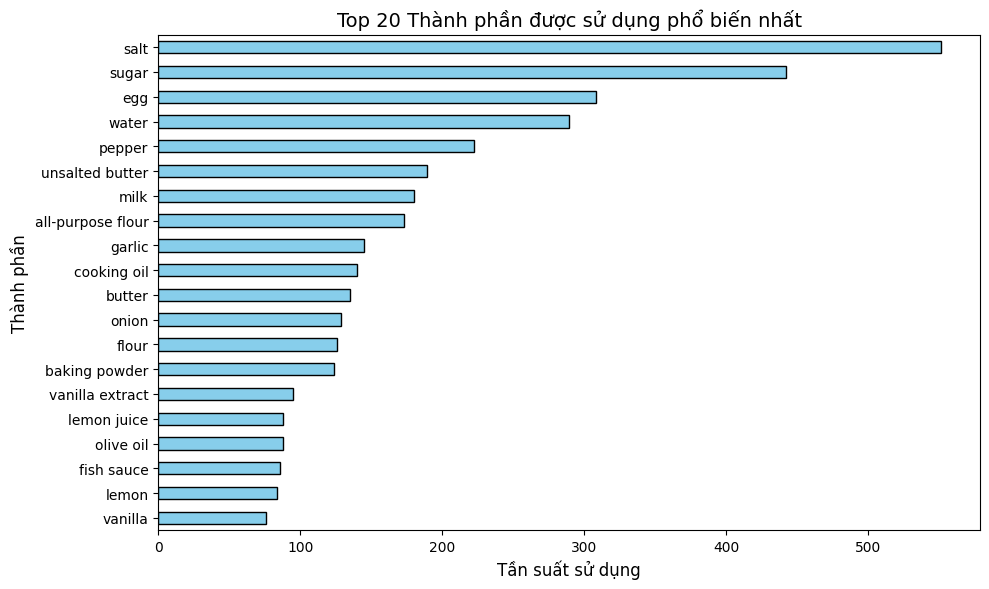

In [20]:
#trực quan hóa dữ liệu
# vẽ biểu đồ cột ngang cho top 10 nguyên lieu pho biến nhat

# Vẽ biểu đồ cột ngang
plt.figure(figsize=(10, 6))
top_20_cols.sort_values().plot(kind='barh', color='skyblue', edgecolor='black')

# Thêm tiêu đề và nhãn
plt.title('Top 20 Thành phần được sử dụng phổ biến nhất', fontsize=14)
plt.xlabel('Tần suất sử dụng', fontsize=12)
plt.ylabel('Thành phần', fontsize=12)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()



#### ___Nhận xét___
- Nguyên liệu phổ biến nhất:
    - ___Muối (salt)___ là thành phần được sử dụng phổ biến nhất, với tần suất vượt trội (gần 350). Đây là một nguyên liệu cơ bản trong hầu hết các món ăn, đặc biệt là trong các món mặn.
- Các nguyên liệu có tần suất cao:
    - ___Tiêu (pepper)___ và ___nước (water)___ cũng có tần suất sử dụng rất cao, điều này cho thấy các nguyên liệu này thường xuyên xuất hiện trong các công thức món ăn.
- Nhóm nguyên liệu cơ bản:
    - Các thành phần như ___đường (sugar)___, ___tỏi (garlic)___, và ___trứng (egg)___ đều có tần suất sử dụng đáng kể, chứng tỏ chúng là nguyên liệu cơ bản trong nhiều món ăn.
- Nhóm nguyên liệu phụ:
    - Các thành phần như ___hành (onion)___,___dầu ăn (cooking oil)___, và ___bơ không muối (unsalted butter)___ nằm trong nhóm nguyên liệu phụ, với tần suất sử dụng thấp hơn nhưng vẫn quan trọng trong việc tạo hương vị và cấu trúc cho món ăn.
- Tần suất thấp:
    - ___Sữa (milk)___ có tần suất thấp hơn so với các nguyên liệu khác, tuy nhiên vẫn là một thành phần quan trọng trong nhiều món ăn, đặc biệt là trong các món bánh hoặc món ăn sáng.

#### ___Một số thông tin hữu ích___
- Các nguyên liệu như muối, tiêu, nước, và đường có vẻ như là các thành phần cơ bản và đa dụng nhất trong các công thức món ăn.
- Những thành phần như tỏi, hành, và trứng có thể được sử dụng trong các món ăn mặn hoặc món ăn chế biến nhanh.
- Dầu ăn và bơ thường được sử dụng để chiên xào hoặc tạo độ béo cho các món ăn, trong khi sữa có tần suất thấp, có thể chỉ được dùng trong các công thức đặc biệt như làm bánh, chế biến các món ăn ngọt hoặc món ăn sáng.

#### __2. Khả năng kết hợp của các thành phần phổ biến__ 

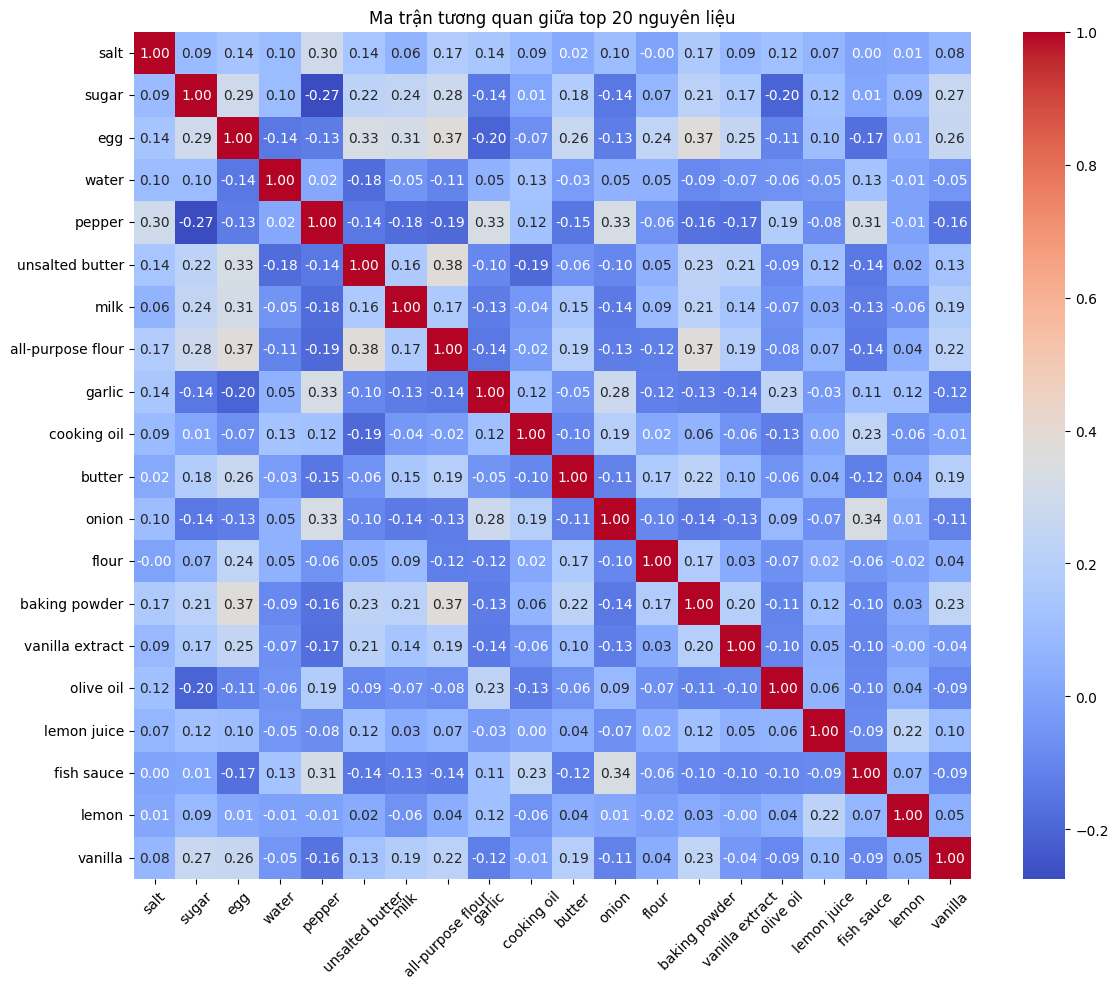

In [21]:
# vẽ ma trận tương quan giữa top 20 nguyên liệu trên
# Lọc raw_df chỉ với top 20 nguyên liệu

filtered_df = raw_df[top_20_cols.index]
# Tính ma trận tương quan
correlation_matrix = filtered_df.corr()

# Vẽ heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Ma trận tương quan giữa top 20 nguyên liệu')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#### ___Nhận xét___
- Những cặp nguyên liệu có mối tương quan dương cao:

    + salt và pepper có tương quan cao (≈ 0.38), thể hiện rằng chúng thường được sử dụng cùng nhau.
    + unsalted butter và flour có mối tương quan dương đáng kể (≈ 0.31), cho thấy đây có thể là các nguyên liệu phổ biến trong các công thức nướng bánh.
    + milk và unsalted butter có tương quan khá cao, điều này có thể ám chỉ rằng chúng thường được sử dụng trong các món ăn liên quan đến chế phẩm từ sữa.
- Những cặp nguyên liệu có mối tương quan âm:

    + pepper và sugar có tương quan âm rõ rệt (≈ -0.24), cho thấy chúng thường không được sử dụng chung trong cùng công thức.
    + fish sauce và vanilla extract cũng có mối tương quan âm đáng chú ý, ám chỉ rằng chúng thuộc hai nhóm món ăn hoàn toàn khác nhau (mặn và ngọt).
- Các nguyên liệu có mối liên hệ thấp với hầu hết các nguyên liệu khác:

    + Các nguyên liệu như carrot, honey, và ginger có xu hướng có giá trị tương quan thấp (gần 0) với nhiều nguyên liệu khác. Điều này có thể ngụ ý rằng chúng được sử dụng riêng biệt hoặc trong các món ăn đặc thù.

#### ___Kết luận___
Biểu đồ cho thấy một số nhóm nguyên liệu thường được sử dụng cùng nhau (ví dụ: unsalted butter với flour và milk), phản ánh đặc điểm chung của các công thức nấu ăn. 

#### _Mạng lưới hương vị: Mối quan hệ giữa top 20 nguyên liệu phổ biến_

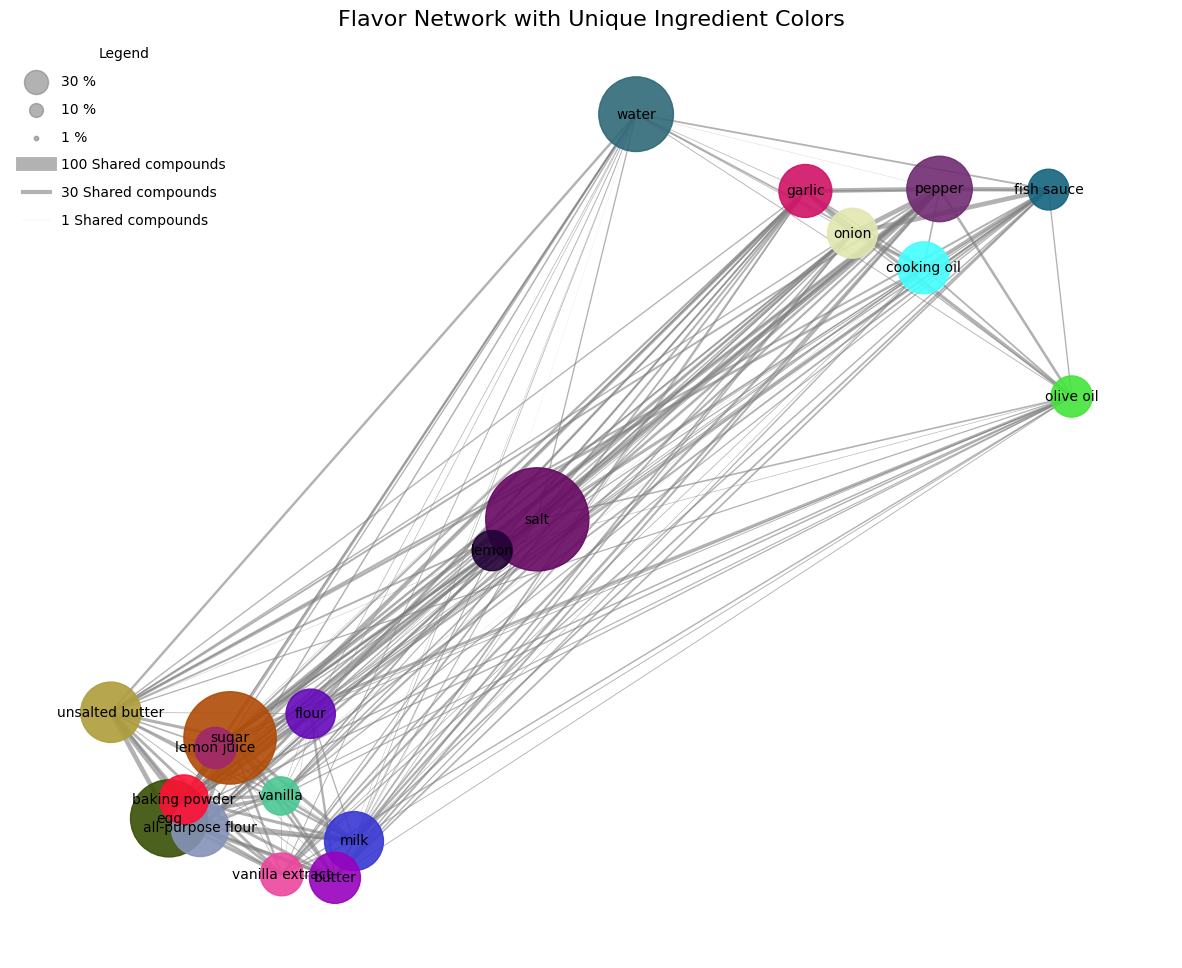

In [22]:
import networkx as nx
import random
import matplotlib.patches as mpatches


# Tạo đồ thị
G = nx.Graph()

# Thêm node với kích thước và màu sắc
colors = {}
for ingredient, freq in top_20_cols.items():
    G.add_node(ingredient, size=freq)
    colors[ingredient] = (random.random(), random.random(), random.random())  # Màu ngẫu nhiên

# Thêm cạnh từ ma trận tương quan
for ingredient1 in top_20_cols.keys():
    for ingredient2 in top_20_cols.keys():
        if ingredient1 != ingredient2:
            weight = correlation_matrix.loc[ingredient1, ingredient2]
            G.add_edge(ingredient1, ingredient2, weight=weight)

# Vẽ đồ thị
plt.figure(figsize=(15, 12))
pos = nx.spring_layout(G, seed=42)

# Vẽ node
node_sizes = [G.nodes[node]['size'] * 10 for node in G.nodes]
node_colors = [colors[node] for node in G.nodes]
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, alpha=0.9)

# Vẽ cạnh
edges = G.edges(data=True)
edge_widths = [data['weight'] * 10 for _, _, data in edges]
nx.draw_networkx_edges(G, pos, width=edge_widths, edge_color='gray', alpha=0.6)

# Vẽ nhãn
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')

# Thêm chú thích cho Prevalence
legend_sizes = [30, 10, 1]  # Ví dụ kích thước cho chú thích Prevalence
for size in legend_sizes:
    plt.scatter([], [], s=size * 10, color='gray', alpha=0.6, label=f'{size} %')

# Thêm chú thích cho Shared compounds
edge_widths_legend = [100, 30, 1]  # Các mức độ dày khác nhau
for width in edge_widths_legend:
    plt.plot([], [], linewidth=width / 10, color='gray', alpha=0.6, label=f'{width} Shared compounds')

# Hiển thị chú thích
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, loc='upper left', fontsize=10, title='Legend')

# Thêm tiêu đề và tắt trục
plt.title("Flavor Network with Unique Ingredient Colors", fontsize=16)
plt.axis('off')
plt.show()

#### ___Nhận xét___
- Kết cấu mạng lưới:

    + Biểu đồ thể hiện một mạng lưới kết nối giữa 20 nguyên liệu phổ biến nhất trong nấu ăn, dựa trên mức độ tương quan giữa chúng.
    + Các đường kết nối (cạnh) thể hiện mức độ liên quan giữa các nguyên liệu, với độ dày thay đổi tương ứng với mức độ mạnh yếu của mối liên hệ.
- Kích thước nút:

    + Kích thước của các nút (node) phản ánh tần suất xuất hiện của từng nguyên liệu trong dữ liệu.
    + Salt, pepper, và water là các nguyên liệu phổ biến nhất, vì vậy chúng có kích thước lớn hơn rõ rệt.

- Tính tương tác:

    + Các nguyên liệu như garlic, olive oil, và onion có nhiều liên kết mạnh, thể hiện rằng chúng thường được sử dụng cùng với các nguyên liệu khác trong công thức nấu ăn.
- Sự phân bố các cạnh:

    + Hầu hết các nguyên liệu đều có sự kết nối rõ rệt, cho thấy tính đa dạng trong việc kết hợp nguyên liệu khi chế biến món ăn.
    + Các cạnh dày hơn xuất hiện giữa những nguyên liệu có mối liên hệ chặt chẽ, ví dụ như garlic và olive oil, điều này phản ánh các cặp nguyên liệu thường xuyên được sử dụng cùng nhau.

#### ___Phần 2: Phân tích độ phức tạp của các món ăn dựa trên số lượng nguyên liệu cũng như độ phổ biến của chúng___

#### Đầu tiên chúng ta cùng quan sát xem, để tạo ra mỗi món ăn thì số nguyên liệu cần thiết thường là bao nhiêu?

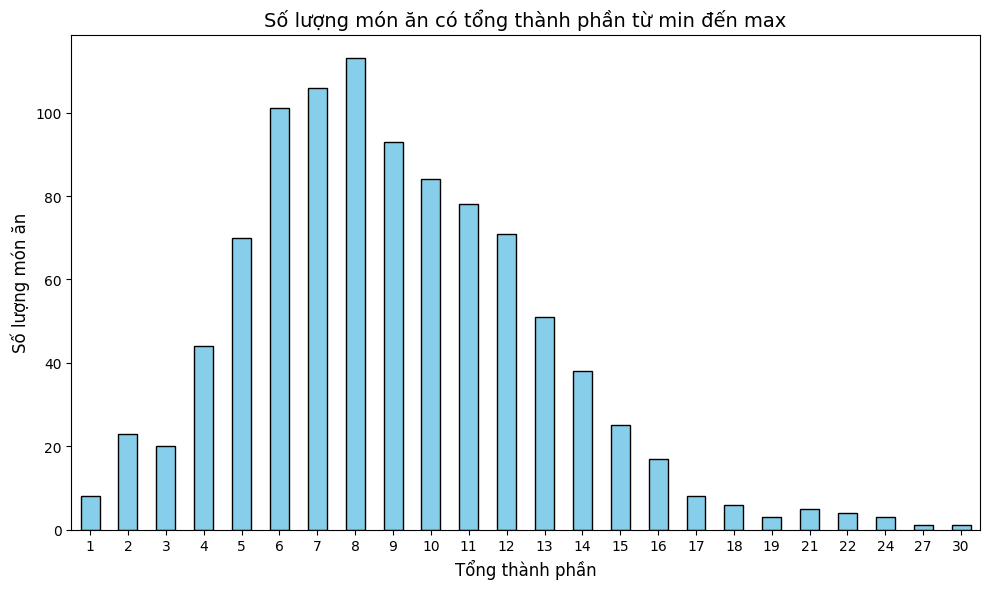

In [23]:
#tính tổng theo hàng và vẽ biểu đồ
# Tính tổng theo hàng đặt tên là tổng thành phần
temp_df = raw_df.copy()
temp_df['Total'] = temp_df.iloc[:, 1:].sum(axis=1)
# lấy ra min và max của cột Total
min_total = temp_df['Total'].min()
max_total = temp_df['Total'].max()
# vẽ biểu đồ cột với số lượng món ăn có tổng thành phần từ min đến max
plt.figure(figsize=(10, 6))
temp_df['Total'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Số lượng món ăn có tổng thành phần từ min đến max', fontsize=14)
plt.xlabel('Tổng thành phần', fontsize=12)
plt.ylabel('Số lượng món ăn', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



#### ___Nhận xét___
- Phân phối tổng thành phần:
Phổ biến nhất: Số món ăn có 6, 7 và 8 thành phần là cao nhất (từ 60-70 món ăn cho mỗi nhóm). Điều này cho thấy công thức với số lượng thành phần này là phổ biến trong tập dữ liệu.
Ít phổ biến hơn: Những món ăn có ít hơn 4 thành phần hoặc nhiều hơn 15 thành phần xuất hiện ít hơn đáng kể. Điều này có thể ám chỉ rằng các món đơn giản (ít thành phần) hoặc phức tạp (nhiều thành phần) là ít phổ biến hơn.
- Dạng phân phối:
Biểu đồ có dạng phân phối lệch phải: Phần lớn món ăn nằm trong khoảng 6-12 thành phần, và số lượng món ăn giảm dần khi số lượng thành phần tăng lên (hoặc giảm đi).
Những giá trị cực biên (như món ăn với 1 hoặc 31 thành phần) xuất hiện với tần suất rất nhỏ.
- Ý nghĩa thực tiễn:
Với món ăn phổ biến: Những công thức có khoảng 6-12 thành phần có thể đại diện cho các món ăn phổ biến, cân bằng giữa sự đơn giản và đa dạng nguyên liệu.
Với món ăn đặc biệt: Món ăn có ít hoặc nhiều thành phần bất thường có thể đại diện cho các công thức đơn giản (ví dụ: món ăn nhanh, cơ bản) hoặc phức tạp (ví dụ: các món ăn cầu kỳ hoặc đặc sản).
- Ứng dụng:
Dữ liệu này có thể hỗ trợ trong việc thiết kế công thức hoặc gợi ý món ăn phù hợp với số lượng nguyên liệu mà người dùng có sẵn.
Ngoài ra, nhóm món ăn trong khoảng 6-8 thành phần có thể được tập trung để tối ưu hóa nội dung hoặc đề xuất.

#### **1. Đánh giá độ phức tạp**

In [24]:
# số lượng nguyên liệu trong mỗi món ăn
ingredient_count = raw_df.iloc[:, 1:].sum(axis=1)
# tìm tần số xuất hiện của các nguyên liệu
ingredient_frequency = raw_df.iloc[:, 1:].sum()
# chuẩn hóa tần số xuất hiện của từng nguyên liệu về khoảng 0-1
normalized_ingredient_frequency = (ingredient_frequency - ingredient_frequency.min()) / (ingredient_frequency.max() - ingredient_frequency.min())

# tính điểm độ phức tạp
complexity_score = raw_df.mul(1-normalized_ingredient_frequency, axis=1).sum(axis=1)

# tạo dataframe tạm thời để lưu điểm độ phức tạp
temp_df = raw_df.copy()
temp_df['Complexity Score'] = complexity_score

# chia mức độ phức tạp thành 5 nhóm
def assign_stars(score, max_score):
    if score >= 0.8 * max_score:
        return 5
    elif score >= 0.6 * max_score:
        return 4
    elif score >= 0.4 * max_score:
        return 3
    elif score >= 0.2 * max_score:
        return 2
    else:
        return 1
    
max_score = temp_df['Complexity Score'].max()
temp_df['Complexity Level'] = temp_df['Complexity Score'].apply(lambda x: assign_stars(x, max_score))


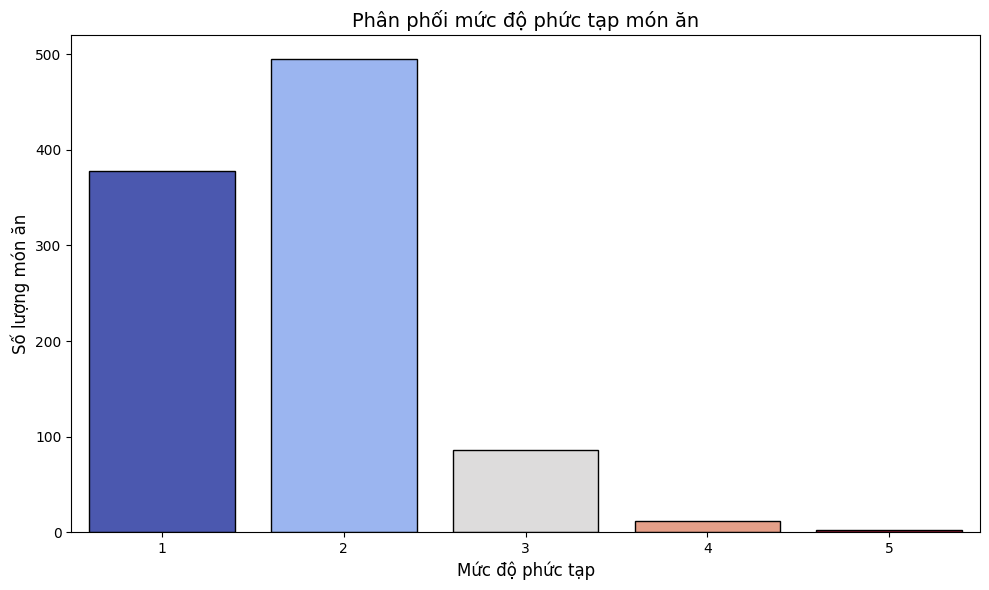

In [25]:
# vẽ biểu đồ phân phối mức độ phức tạp
plt.figure(figsize=(10, 6))
sns.countplot(x='Complexity Level', data=temp_df, palette='coolwarm', edgecolor='black', hue='Complexity Level', legend=False)
plt.title('Phân phối mức độ phức tạp món ăn', fontsize=14)
plt.xlabel('Mức độ phức tạp', fontsize=12)
plt.ylabel('Số lượng món ăn', fontsize=12)
plt.tight_layout()
plt.show()


#### **Nhận xét**
- Đa số các món ăn trong dataset tạp trung ở mức độ phức tạp từ dễ đến trung bình (1-3).
- Các món có độ phức tạp cao hơn rất ít, cho thấy các món ăn đòi hỏi nhiểu nguyên liệu hiếm gặp, ít sử dụng là không phổ biến trong các món ăn thường ngày.
- Cụ thể, mức độ phức tạp **2** chiếm số lượng lớn nhất (khoảng 350 món ăn).
Tiếp đến là mức độ phức tạp **1** đứng thứ hai với hơn 200 món ăn. Còn lại, số lượng các món ăn được đánh giá ở các mức **3**, **4**, và **5** giảm dần rõ rệt, đặc biệt mức **5** chỉ chiếm tầm 1-5 món.

#### **2. Top món ăn có độ phức tạp cao**

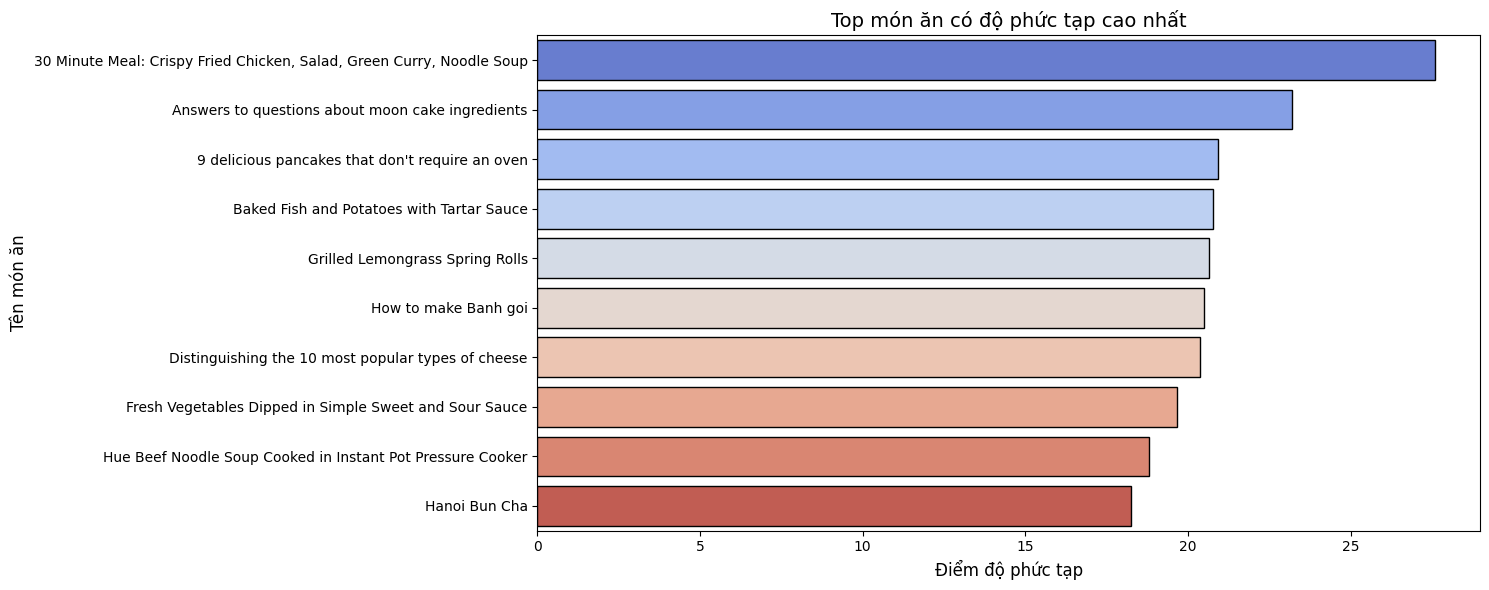

In [26]:
# top món ăn có độ phức tạp cao nhất
top_complex_meals = temp_df.sort_values('Complexity Score', ascending=False).head(10)[['Name of dish', 'Complexity Score']]

# vẽ biểu đồ cột cho top món ăn có độ phức tạp cao nhất
plt.figure(figsize=(15, 6))
sns.barplot(x='Complexity Score', y='Name of dish', data=top_complex_meals, palette='coolwarm', edgecolor='black', hue='Name of dish', legend=False)
plt.title('Top món ăn có độ phức tạp cao nhất', fontsize=14)
plt.xlabel('Điểm độ phức tạp', fontsize=12)
plt.ylabel('Tên món ăn', fontsize=12)
plt.tight_layout()
plt.show()


In [27]:
print('Số lượng nguyên liệu trong mỗi món ăn trên:\n')
result = "\n".join(
    f"{i+1}. Món {raw_df.loc[top_complex_meals.index[i], 'Name of dish']}: {ingredient_count[top_complex_meals.index[i]]}"
    for i in range(len(top_complex_meals))
)
print(result)


Số lượng nguyên liệu trong mỗi món ăn trên:

1. Món 30 Minute Meal: Crispy Fried Chicken, Salad, Green Curry, Noodle Soup: 30
2. Món Answers to questions about moon cake ingredients: 27
3. Món 9 delicious pancakes that don't require an oven: 22
4. Món Baked Fish and Potatoes with Tartar Sauce: 24
5. Món Grilled Lemongrass Spring Rolls: 24
6. Món How to make Banh goi: 24
7. Món Distinguishing the 10 most popular types of cheese: 22
8. Món Fresh Vegetables Dipped in Simple Sweet and Sour Sauce: 22
9. Món Hue Beef Noodle Soup Cooked in Instant Pot Pressure Cooker: 21
10. Món Hanoi Bun Cha: 22


#### **Nhận xét**
- Món *Gà rán giòn, Salat, Cà Ri Xanh, Mỳ Trộn* (*30 Minute Meal: Crispy Fried Chicken, Salad, Green Curry, Noodle Soup*) có điểm phức tạp cao nhất, vượt trội so với các món ăn còn lại, món ăn bao gồm nhiều loại nguyên liệu khác nhau và sử dụng một số nguyên liệu ít phổ biến.
- Các món còn lại không có sự chênh lệch quá nhiều, có điểm phức tạp tập trung dao động ở mức 18-21 và số lượng nguyên liệu của các món này nằm trong khoảng 22-24 nguyên liệu/món.

#### **3. Top món ăn có độ phức tạp thấp**

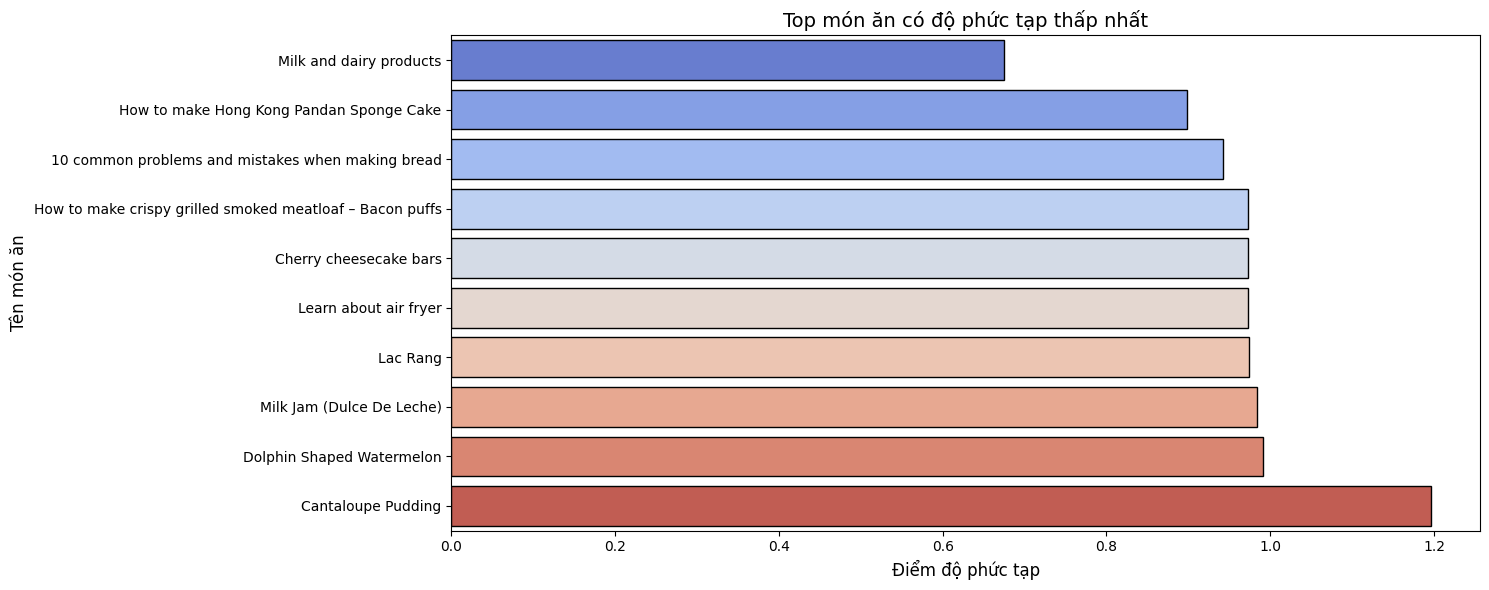

In [28]:
# top món ăn có độ phức tạp thấp nhất
top_less_complex_meals = temp_df.sort_values('Complexity Score', ascending=True).head(10)[['Name of dish', 'Complexity Score']]

# vẽ biểu đồ cột cho top món ăn có độ phức tạp thấp nhất
plt.figure(figsize=(15, 6))
sns.barplot(x='Complexity Score', y='Name of dish', data=top_less_complex_meals, palette='coolwarm', edgecolor='black', hue='Name of dish', legend=False)
plt.title('Top món ăn có độ phức tạp thấp nhất', fontsize=14)
plt.xlabel('Điểm độ phức tạp', fontsize=12)
plt.ylabel('Tên món ăn', fontsize=12)
plt.tight_layout()
plt.show()


In [29]:
print('Số lượng nguyên liệu trong mỗi món ăn trên:\n')
result = "\n".join(
    f"{i+1}. Món {raw_df.loc[top_less_complex_meals.index[i], 'Name of dish']}: {ingredient_count[top_less_complex_meals.index[i]]}"
    for i in range(len(top_less_complex_meals))
)
print(result)


Số lượng nguyên liệu trong mỗi món ăn trên:

1. Món Milk and dairy products: 1
2. Món How to make Hong Kong Pandan Sponge Cake: 1
3. Món 10 common problems and mistakes when making bread: 1
4. Món How to make crispy grilled smoked meatloaf – Bacon puffs: 1
5. Món Cherry cheesecake bars: 1
6. Món Learn about air fryer: 1
7. Món Lac Rang: 1
8. Món Milk Jam (Dulce De Leche): 2
9. Món Dolphin Shaped Watermelon: 1
10. Món Cantaloupe Pudding: 2


#### **Nhận xét:**
- Ngược lại với các món phức tạp ở phía trên, các món ăn ít phức tạp nhất chỉ cần số ít nguyên liệu để thực hiện (1-2 nguyên liệu).
- Tuy nhiên, mỗi món ăn trên có điểm phức tạp khác nhau tùy thuộc vào mức độ phổ biến của các nguyên liệu chúng sử dụng

#### ___Xác định thành phần chính của dữ liệu___

Áp dụng PCA để tìm các thành phần chính của tập dữ liệu

In [31]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



# Drop the "Name of dish" column
ingredients_data = raw_df.drop(columns=["Name of dish"])

# Standardize the data
scaler = StandardScaler()
ingredients_scaled = scaler.fit_transform(ingredients_data)

# Apply PCA
pca = PCA()
pca_result = pca.fit_transform(ingredients_scaled)

# Extract the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Display explained variance ratio for the top 5 components
for i, variance in enumerate(explained_variance_ratio[:5], start=1):
    print(f"Principal Component {i}: {variance:.4f} explained variance ratio")

# (Optional) Save the PCA-transformed data to a file
pca_transformed_df = pd.DataFrame(pca_result, columns=[f"PC{i+1}" for i in range(pca_result.shape[1])])
pca_transformed_df.to_csv('../Assert/pca_transformed_data.csv', index=False)
print("PCA-transformed data saved as 'pca_transformed_data.csv'.")



Principal Component 1: 0.0106 explained variance ratio
Principal Component 2: 0.0085 explained variance ratio
Principal Component 3: 0.0078 explained variance ratio
Principal Component 4: 0.0077 explained variance ratio
Principal Component 5: 0.0074 explained variance ratio
PCA-transformed data saved as 'pca_transformed_data.csv'.


#### ___Trực quan hóa dữ liệu sau khi áp dụng PCA(2D)___

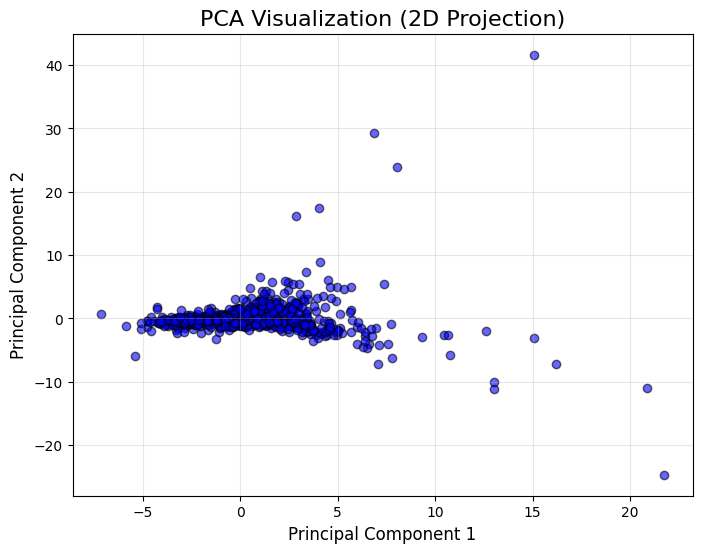

In [32]:
pca_2d = PCA(n_components=2)
pca_2d_result = pca_2d.fit_transform(ingredients_scaled)

# Scatter plot of the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(pca_2d_result[:, 0], pca_2d_result[:, 1], alpha=0.6, color='blue', edgecolor='k')
plt.title("PCA Visualization (2D Projection)", fontsize=16)
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)
plt.grid(alpha=0.3)
plt.show()